<a href="https://colab.research.google.com/github/SAJAD-52/Haberman_s_Breast_Cancer_Survival_Prediction.ipynb/blob/main/Haberman_s_Breast_Cancer_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data1 = pd.read_csv("haberman.csv")

In [ ]:
data1

,age,year,nodes,status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [ ]:
print(data1.head())

   age  year  nodes  status
0   30    62      3       1
1   30    65      0       1
2   31    59      2       1
3   31    65      4       1
4   33    58     10       1


In [ ]:
import seaborn as sns

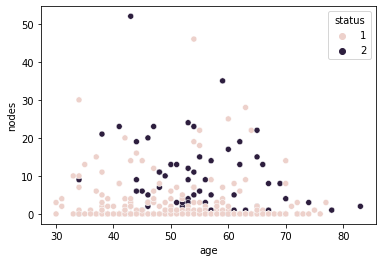

In [ ]:
sns.scatterplot(x="age", y="nodes", hue="status", data=data1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


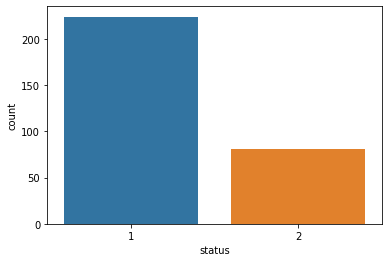

In [ ]:
sns.countplot(data1['status'])

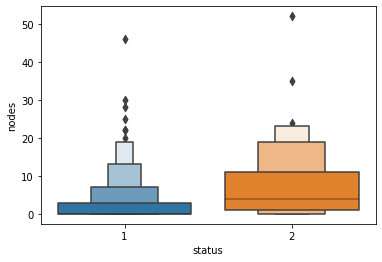

In [ ]:
sns.boxenplot(x="status", y="nodes", data=data1 )
plt.show()

<function matplotlib.pyplot.show>

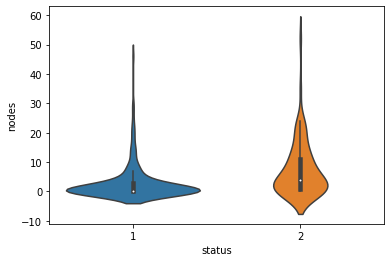

In [ ]:
sns.violinplot(x='status', y='nodes', data=data1, size=8)
plt.show

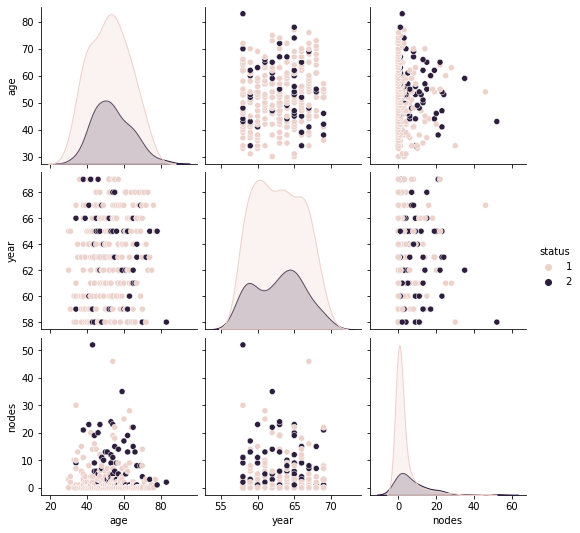

In [ ]:
sns.pairplot(data1, hue='status', vars=['age', 'year', 'nodes'])

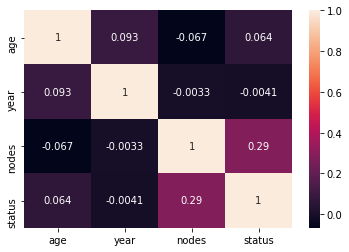

In [ ]:
sns.heatmap(data1.corr(), annot=True)

In [ ]:
#building our model


In [ ]:
#devive our dataset into two categories x and y
dataF = pd.DataFrame(data1, columns=['age', 'year', 'nodes', 'status'])

In [ ]:
x = dataF.drop(['status'], axis=1)

In [ ]:
y = dataF['status']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

In [ ]:
x_train.shape

(244, 3)

In [ ]:
y_train.shape

(244,)

In [ ]:
x_test.shape

(61, 3)

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
svc_model = SVC(gamma='auto')

In [ ]:
svc_model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predict = svc_model.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_predict)

In [ ]:
cm

array([[43,  0],
       [17,  1]])

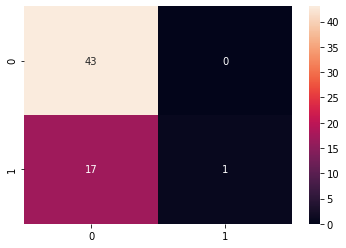

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.72      1.00      0.83        43
           2       1.00      0.06      0.11        18

    accuracy                           0.72        61
   macro avg       0.86      0.53      0.47        61
weighted avg       0.80      0.72      0.62        61



In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
x_train_scaler = min_max_scaler.fit_transform(x_train)
x_test_scaler = min_max_scaler.fit_transform(x_test)

In [ ]:
svc_model.fit(x_train_scaler, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predict_scaled = svc_model.predict(x_test_scaler)

In [ ]:
cm = confusion_matrix(y_test, y_predict_scaled)

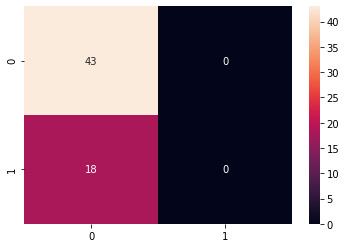

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_scaled))

              precision    recall  f1-score   support

           1       0.70      1.00      0.83        43
           2       0.00      0.00      0.00        18

    accuracy                           0.70        61
   macro avg       0.35      0.50      0.41        61
weighted avg       0.50      0.70      0.58        61



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
